In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from model import LinearRegression
from utils import train_test_split, standardize, standardize_targets

In [7]:
data = pd.read_csv('FoDS-Assignment-2.csv')
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,4,1.75,2120.0,7420,1.0,0,0,4,7,1060.0,1060,1540,7420,453000.0
1,4,2.50,2180.0,9861,2.0,0,2,3,8,2180.0,0,2390,9761,480000.0
2,3,1.50,1540.0,9800,1.0,0,0,3,7,1010.0,530,1600,8250,180500.0
3,3,3.50,2380.0,6250,2.0,0,3,3,8,1670.0,710,2540,4010,495000.0
4,4,2.50,2230.0,8500,2.0,0,0,3,8,2230.0,0,2270,8770,325000.0


# Dataset Analysis

In [8]:
data.isnull().sum()

bedrooms          0
bathrooms         0
sqft_living      14
sqft_lot          0
floors           13
waterfront        0
view              0
condition         0
grade             0
sqft_above       14
sqft_basement     0
sqft_living15     0
sqft_lot15        0
price             0
dtype: int64

# Handling missing values
## Imputation technique: Impute missing values with mean

In [9]:
data['sqft_living'] = data['sqft_living'].replace(np.NaN, data['sqft_living'].mean())
data['floors'] = data['floors'].replace(np.NaN, data['floors'].mean())
data['sqft_above'] = data['sqft_above'].replace(np.NaN, data['sqft_above'].mean())

In [11]:
X = data.iloc[:, :-1].to_numpy().T
y = data.iloc[:, -1].to_numpy().reshape(-1, 1)

In [12]:
# Dataset Details
X.shape, y.shape

((13, 1188), (1188, 1))

# Preprocessing

In [13]:
# Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=42)
X_train, X_test = standardize(X_train, X_test)
y_train, y_test = standardize_targets(y_train, y_test)


X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13, 831), (831, 1), (13, 357), (357, 1))

In [16]:
MODEL = LinearRegression(
    num_features=X_train.shape[0], 
    learning_rate=0.01, 
    epochs=500, 
    GD='BatchGD'
)

Cost after iteration 50 : 0.221214740905306
Cost after iteration 100 : 0.20595045179701907
Cost after iteration 150 : 0.20009152690488002
Cost after iteration 200 : 0.19682619688328062
Cost after iteration 250 : 0.19471359284923095
Cost after iteration 300 : 0.19323348219315128
Cost after iteration 350 : 0.19214992799258596
Cost after iteration 400 : 0.19133551945225175
Cost after iteration 450 : 0.19071279262765667
Cost after iteration 500 : 0.19023087635799285


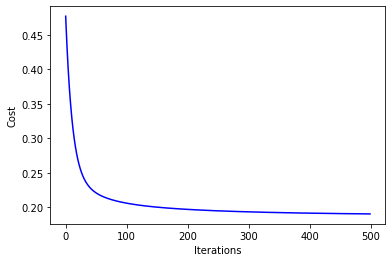

In [17]:
MODEL.train(X_train, y_train, plot_loss_curves=True)